### Goal: recreate figure 4 from [Schmidt, et al. 2022](https://www.science.org/doi/10.1126/science.abj4008)

Schematic of CRISPR activation Perturb-seq experiment below:

<div>
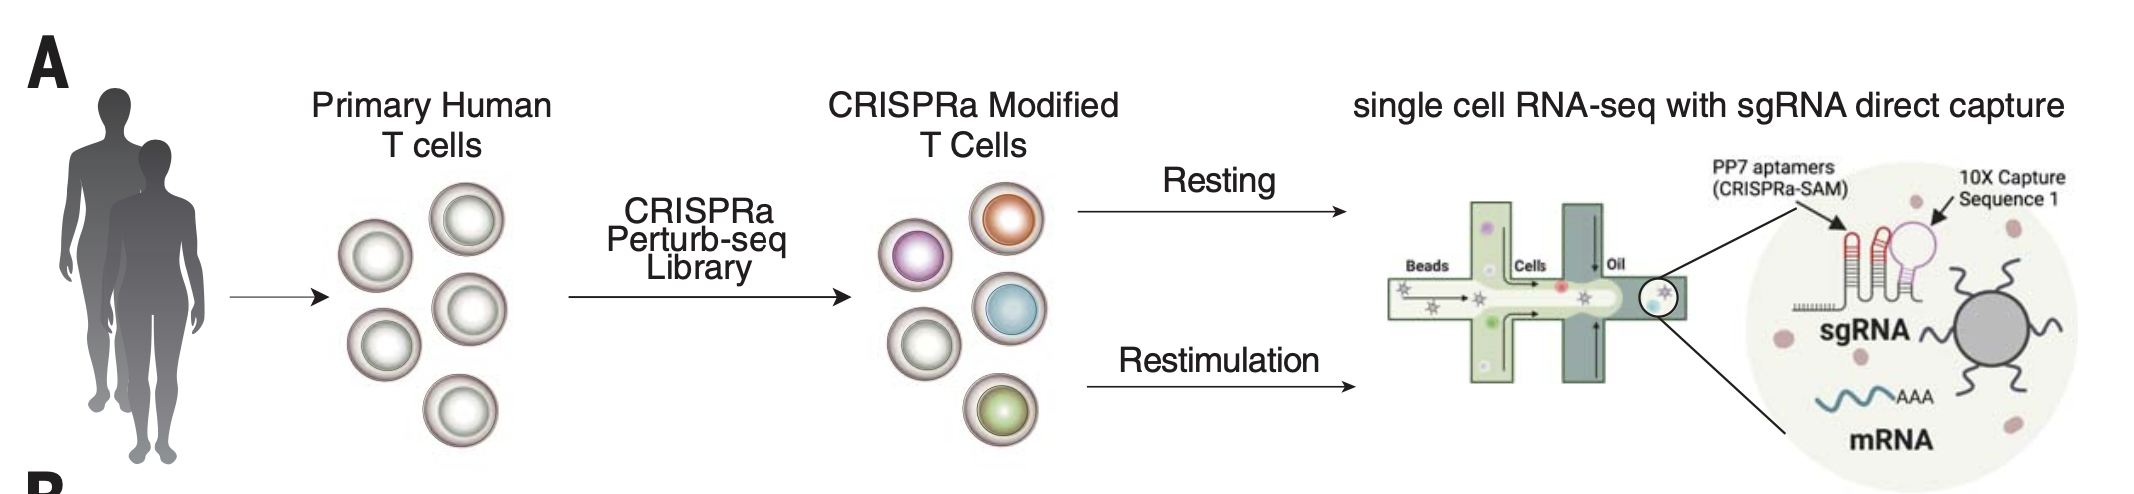
</div>

Data available in NCBI Gene Expression Omnibus [GSE190604](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse190604)

Steps are from their *Methods* section.

### Step 1: [Cell Ranger](https://www.10xgenomics.com/support/software/cell-ranger/latest) version 6.1.1 for alignments and count aggregation of gene expression and sgRNA reads.

Gene expression and sgRNA reads aligned using *cellranger count* with default settings.

Gene expression reads aligned to “refdata-gex-GRCh38-2020-A” human transcriptome reference downloaded from 10X Genomics.

sgRNA reads aligned to Perturb-seq library using pattern *(BC)GTTTAAGAGCTATG*.

counts aggregated with *cellranger aggr* with default arguments.

used “protospacer_calls_per_cell.csv” as output files when assigning sgRNAs to cells using *cellranger count*, filtering out droplets with >1 sgRNA called (makes sense, we want single cells)
- returned median of 133 sgRNA UMIs in sgRNA singlets
- only droplets with >5 sgRNA UMIs are used in further analysis.
- note: UMI = “unique molecular identifiers”

### Step 2: [Souporcell](https://www.nature.com/articles/s41592-020-0820-1) to de-multiplex cell donors.

Input for each run: bam file and barcodes.tsv file from cellranger count output and reference fasta.

Donor calls across wells harmonized using vcf file outputs from Souporcell using [this publicly available python script](https://github.com/hyunminkang/apigenome/blob/master/scripts/vcf-match-sample-ids).
- should figure out what this code does

### Step 3: Gene expression data imported and analyzed in R with [Seurat version 4.0.3](https://www.nature.com/articles/nbt.3192) *Read10X* function.
Quality filters: mitochondrial reads <25%, detected RNA features >400 and <6000.
- this resulted in 4% of cells being removed from analysis
- why these thresholds?

Recovered median of 401 cells per sgRNA target gene per condition, median 127 sgRNA UMIs per singlet, plus ~2000 cells with no-target control guides per condition.
- 4 sgRNA targets (HELZ2, TCF7, PRDM1, IRX1) removed from downstream analysis because of low cell counts (<100)

**Maybe I can do this using scanpy instead?**

### Step 4: Gene expression counts normalized and transformed using Seurat SCTransform function.

Regressed these variables: percentage mitochondrial reads, S-phase score, and G2/M-phase score

Used normalized and transformed counts for all downstream analysis.

To call CD4+ and CD8+ T cells, CD4/CD8 score for each cell: $log_{2}(\frac{CD4}{mean(CD8A, CD8B)})$
- score < -0.9 called as CD8+ cell
- score > 1.4 called as CD4+ cell

### To be continued:

Steps 5: Uniform manifold approximation and projection (UMAP) plots of restimulated T cells
Steps 6: T cell activation score